## Seismic volume view using VisPy

We'll visualize a seismic volume as a set of slices using `matplotlib`, then look at the same data with a 3D volumetric plot with `vispy`.

Before you start, you need to install the following:

    conda install -y vispy pyopengl
    
Then we have the usual preliminaries:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

Load the data:

In [3]:
data = np.load('../data/F3_volume_3x3_16bit.npy')

In [4]:
data.shape

(194, 299, 451)

## Plot slices with `matplotlib`

In [5]:
tslice = 122
inline = 250
xline = 30

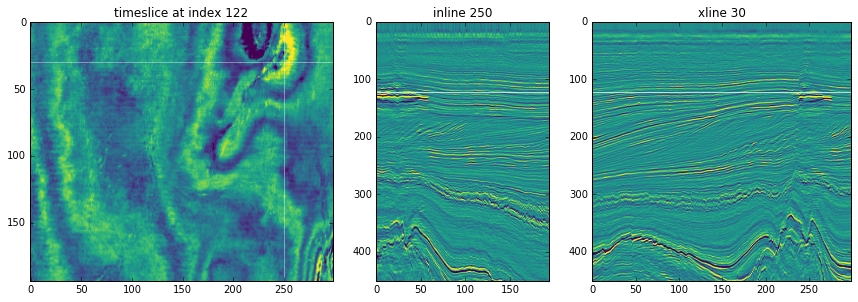

In [9]:
f = plt.figure(figsize=(12,4), facecolor='white')

params = dict(aspect='auto', cmap='viridis', vmin=-8000, vmax=8000)

# Plot timeslice
ax0 = f.add_axes([0.05, 0.05, 0.35, 0.90])
ax0.imshow(data[:, :, tslice], **params)
ax0.set_title('timeslice at index {}'.format(tslice))
ax0.axhline(xline, c='w', alpha=0.4)
ax0.axvline(inline, c='w', alpha=0.4)

# Plot inline
ax1 = f.add_axes([0.45, 0.05, 0.2, 0.90])
ax1.imshow(data[:, inline, :].T, **params)
ax1.set_title('inline {}'.format(inline))
ax1.axhline(tslice, c='w', alpha=0.7)

# Plot xline 
ax2 = f.add_axes([0.70, 0.05, 0.3, 0.90])
ax2.imshow(data[xline, :, :].T, **params)
ax2.set_title('xline {}'.format(xline))
ax2.axhline(tslice, c='w', alpha=0.7)

plt.show()

## Plot subvolume with `vispy`

Interaction, from the `vispy` [docs](http://vispy.org/scene.html):

- LMB: orbits the view around its center point.
- RMB or scroll: change scale_factor (i.e. zoom level)
- SHIFT + LMB: translate the center point
- SHIFT + RMB: change FOV

In [6]:
from vispy.plot import Fig

In [8]:
# Re-organize the data a bit.
vol_data = np.flipud(np.rollaxis(data, 2))

# Make the plot.
fig = Fig()
fig[0, 0].volume(vol_data, cmap='viridis', clim=[0, 2e4])  # Peaks only.
fig.show(run=True)